In [2]:
import numpy as np
from matplotlib import pyplot as plt
from IPython import display

np.random.seed(0)

# save the trajectory into a file
import pickle
import os
# find the next available file path
def get_next_filename(base_name, extension):
    index = 1
    while True:
        filename = f"{base_name}_{index}.{extension}"
        if not os.path.exists(filename):
            return filename
        index += 1

# find the next available folder
def get_next_folder(base_name):
    index = 1
    while True:
        folder = f"{base_name}_{index}"
        if not os.path.exists(folder):
            return folder
        index += 1

# create a folder called world
folder = get_next_folder("world")
os.mkdir(folder)

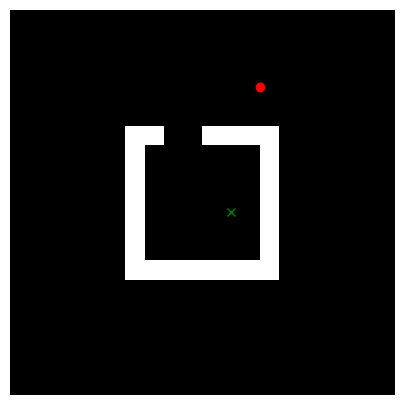

In [3]:
from grid_env import GridEnv
env = GridEnv(sparse=True)
env.plot()

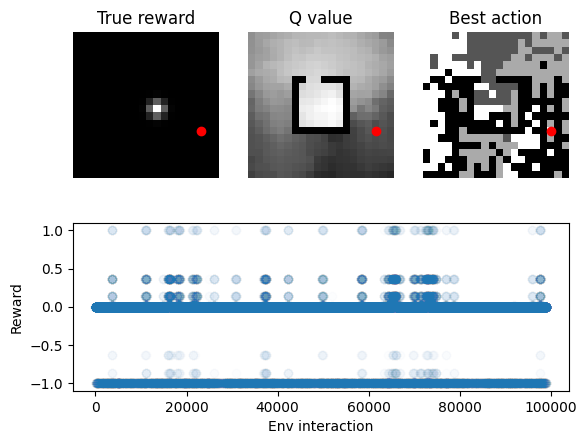

Greediness: 0.0


In [4]:
#Create new env with estimated reward and train agent
new_env = GridEnv(move_penalty=0.0, collision_penalty=1.0)
newQ = new_env.value_iteration(iters=100000,alpha=0.5,gamma=0.99,final_greediness=0.0,eps_anneal=True,disp=True,plot_freq=1000)

In [5]:
# save the new Q as a pickle file
filename = get_next_filename(os.path.join(folder, "Q_table"), "pkl")
with open(filename, "wb") as f:
    pickle.dump(newQ, f)

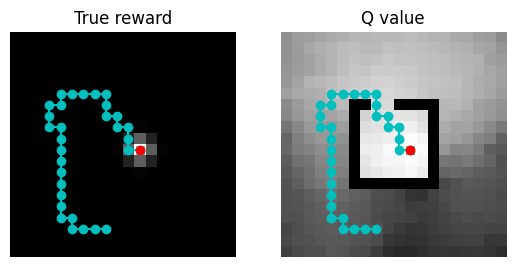

In [17]:
# Test agent on original world
rsum,traj = new_env.test_value(newQ,steps=100,disp=True, greediness=1.0)

In [18]:
# collect trajectories from 1000 episodes
trajs = []
for i in range(150):
    rsum,traj = new_env.test_value(newQ,steps=400,disp=False, greediness=0.8)
    trajs.append(np.vstack(traj))
trajs = np.array(trajs,dtype=object)

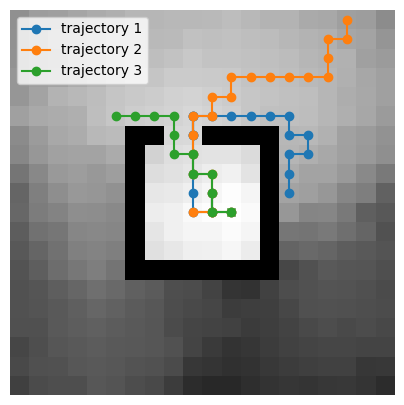

In [21]:
Q_image = np.max(newQ,axis=1).reshape(env.N,env.N).T
#plot a random selection of trajectories
num_plot = 3
plt.figure(figsize=(5,5))
plt.imshow(Q_image, origin="lower",extent=[0,new_env.N,0,new_env.N], cmap='gray')
plt.plot(new_env.xl+0.5,new_env.yl+0.5,'gx') # goal location
for i in range(num_plot):
    plt.plot(trajs[i][:,0]+0.5,trajs[i][:,1]+0.5, '-o',label=f'trajectory {i+1}')
# finish up the rest of the plot settings
plt.legend()
plt.axis('off')
plt.show()

In [22]:

# save the trajectories into that folder
filename = f"{folder}/trajs.pkl"
# save the trajectories into that folder
with open(filename, "wb") as f:
    pickle.dump(trajs, f)
